# **Prediksi total penjualan harian**

Link Dataset: [Dataset SuperStore_Sales_Dataset](https://www.kaggle.com/datasets/ayush12nagar/superstore-sales-dataset?select=SuperStore_Sales_Dataset.csv)

## Import Library

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

## Load Dataset

In [136]:
df = pd.read_csv("SuperStore_Sales_Dataset.csv")
df.head()

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,ind1,ind2
0,4918,CA-2019-160304,01-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,NaN,Online,NaN,NaN
1,4919,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,NaN,Online,NaN,NaN
2,4920,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Technology,Phones,GE 30522EE2,231.98,2,67.2742,NaN,Cards,NaN,NaN
3,3074,CA-2019-125206,03-01-2019,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,NaN,Online,NaN,NaN
4,8604,US-2019-116365,03-01-2019,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,NaN,Online,NaN,NaN


## EDA

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Row ID+O6G3A1:R6  5901 non-null   int64  
 1   Order ID          5901 non-null   object 
 2   Order Date        5901 non-null   object 
 3   Ship Date         5901 non-null   object 
 4   Ship Mode         5901 non-null   object 
 5   Customer ID       5901 non-null   object 
 6   Customer Name     5901 non-null   object 
 7   Segment           5901 non-null   object 
 8   Country           5901 non-null   object 
 9   City              5901 non-null   object 
 10  State             5901 non-null   object 
 11  Region            5901 non-null   object 
 12  Product ID        5901 non-null   object 
 13  Category          5901 non-null   object 
 14  Sub-Category      5901 non-null   object 
 15  Product Name      5901 non-null   object 
 16  Sales             5901 non-null   float64


In [138]:
print(df.nunique())

Row ID+O6G3A1:R6    5900
Order ID            3003
Order Date           643
Ship Date            690
Ship Mode              4
Customer ID          773
Customer Name        773
Segment                3
Country                1
City                 452
State                 49
Region                 4
Product ID          1755
Category               3
Sub-Category          17
Product Name        1742
Sales               5109
Quantity              14
Profit              4739
Returns                1
Payment Mode           3
ind1                   0
ind2                   0
dtype: int64


In [139]:
df[df.duplicated()]

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,ind1,ind2


In [140]:
numeric = df.select_dtypes(include=['number']).columns.tolist()
categorical = df.select_dtypes(exclude=['number']).columns.tolist()

print("Numeric Columns:", numeric)
print("Categorical Columns:", categorical)

Numeric Columns: ['Row ID+O6G3A1:R6', 'Sales', 'Quantity', 'Profit', 'Returns', 'ind1', 'ind2']
Categorical Columns: ['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Payment Mode']


In [141]:
df.isnull().sum()

Row ID+O6G3A1:R6       0
Order ID               0
Order Date             0
Ship Date              0
Ship Mode              0
Customer ID            0
Customer Name          0
Segment                0
Country                0
City                   0
State                  0
Region                 0
Product ID             0
Category               0
Sub-Category           0
Product Name           0
Sales                  0
Quantity               0
Profit                 0
Returns             5614
Payment Mode           0
ind1                5901
ind2                5901
dtype: int64

In [142]:
df.isnull().mean()*100

Row ID+O6G3A1:R6      0.000000
Order ID              0.000000
Order Date            0.000000
Ship Date             0.000000
Ship Mode             0.000000
Customer ID           0.000000
Customer Name         0.000000
Segment               0.000000
Country               0.000000
City                  0.000000
State                 0.000000
Region                0.000000
Product ID            0.000000
Category              0.000000
Sub-Category          0.000000
Product Name          0.000000
Sales                 0.000000
Quantity              0.000000
Profit                0.000000
Returns              95.136418
Payment Mode          0.000000
ind1                100.000000
ind2                100.000000
dtype: float64

In [143]:
df = df.drop(['Returns', 'ind1', 'ind2'], axis=1)

In [144]:
df.isnull().sum()

Row ID+O6G3A1:R6    0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country             0
City                0
State               0
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Profit              0
Payment Mode        0
dtype: int64

In [145]:
min_order_date = df['Order Date'].min()
max_order_date = df['Order Date'].max()

print(f"Minimum Order Date: {min_order_date}")
print(f"Maximum Order Date: {max_order_date}")

Minimum Order Date: 01-01-2019
Maximum Order Date: 31-12-2020


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_70080\591032567.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, sales_per_product[i], round(sales_per_product[i], 2), ha='center')


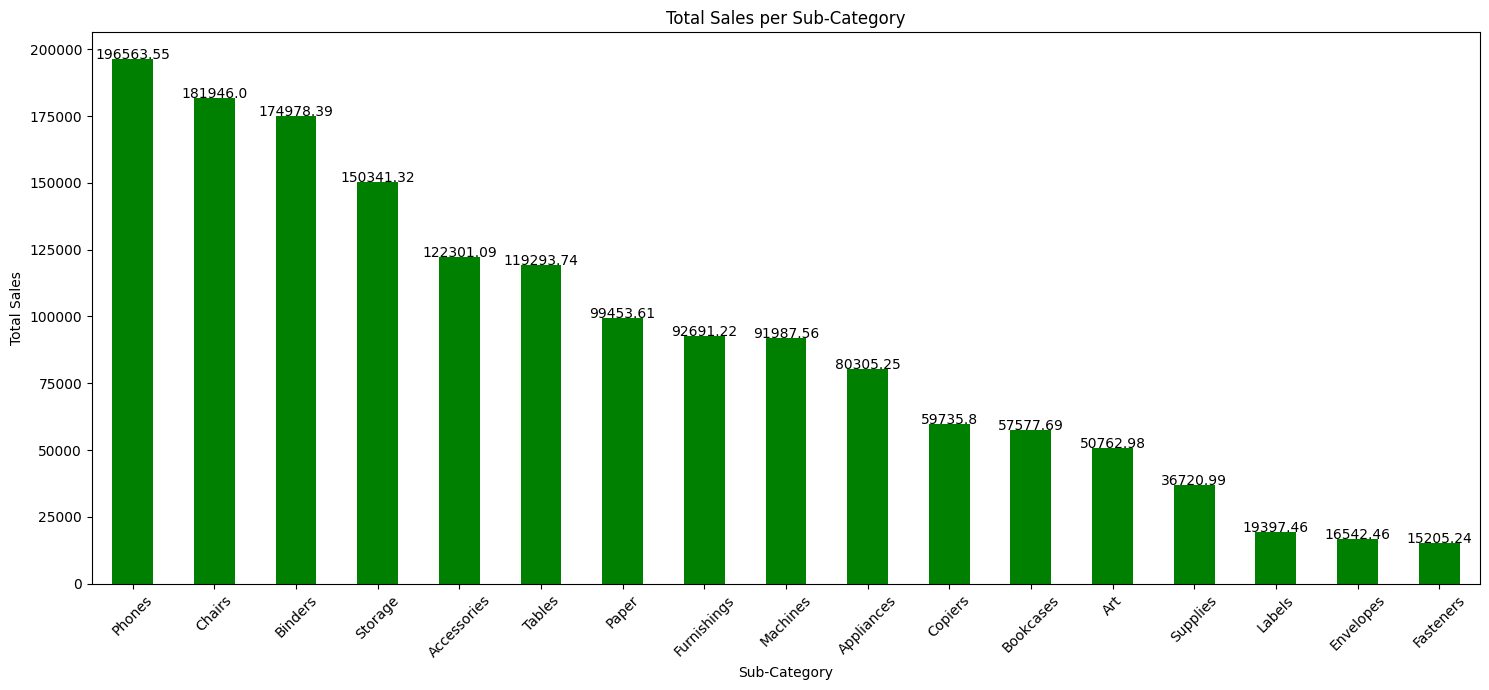

In [146]:
sales_per_product = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 7))
for i in range(len(sales_per_product)):
    plt.text(i, sales_per_product[i], round(sales_per_product[i], 2), ha='center')
sales_per_product.plot(kind='bar', color='green')
plt.title('Total Sales per Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_70080\2953091947.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, sales_Region[i], round(sales_Region[i], 2), ha='center')


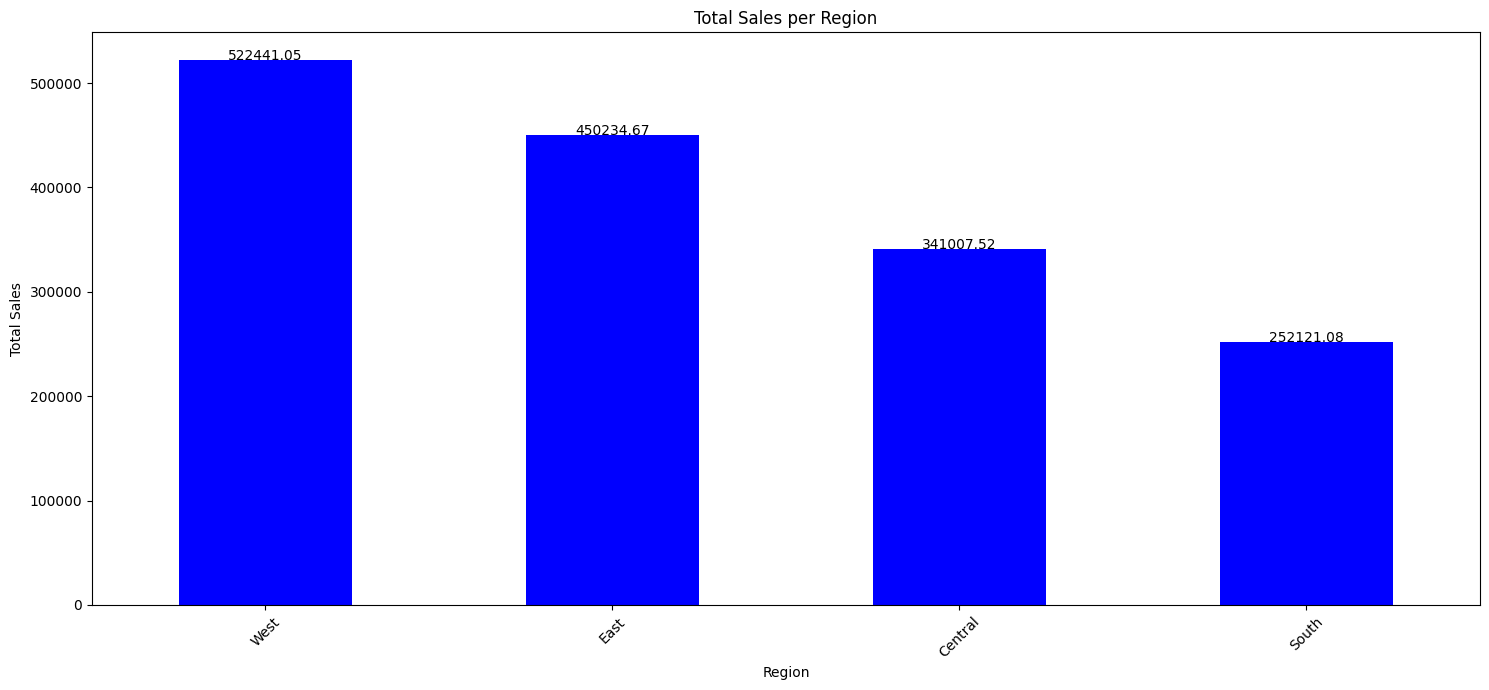

In [147]:
sales_Region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 7))
for i in range(len(sales_Region)):
    plt.text(i, sales_Region[i], round(sales_Region[i], 2), ha='center')
sales_Region.plot(kind='bar', color='blue')
plt.title('Total Sales per Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_70080\3094956281.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, sales_State[i], round(sales_State[i], 2), ha='center')


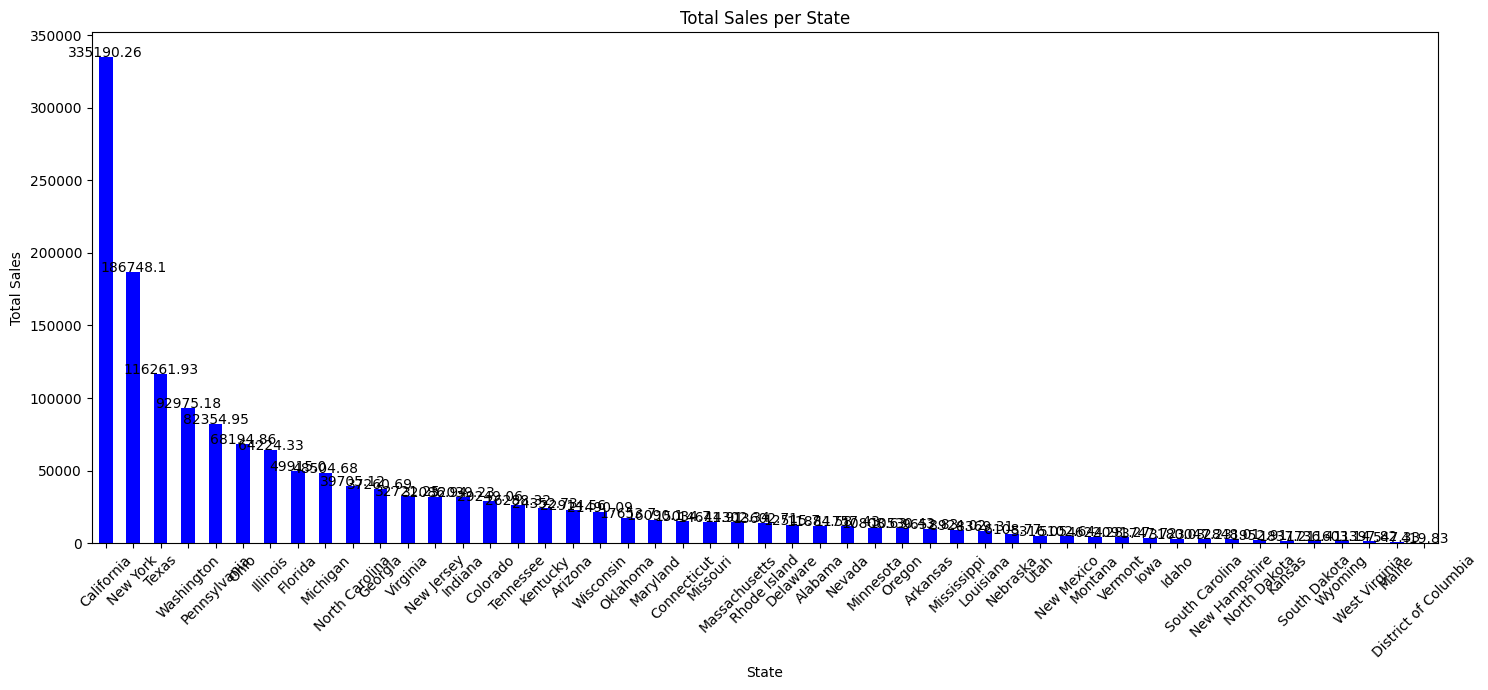

In [148]:
sales_State = df.groupby('State')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 7))
for i in range(len(sales_State)):
    plt.text(i, sales_State[i], round(sales_State[i], 2), ha='center')
sales_State.plot(kind='bar', color='blue')
plt.title('Total Sales per State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_70080\2432930631.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, profit_subcategory[i], round(profit_subcategory[i], 2), ha='center')


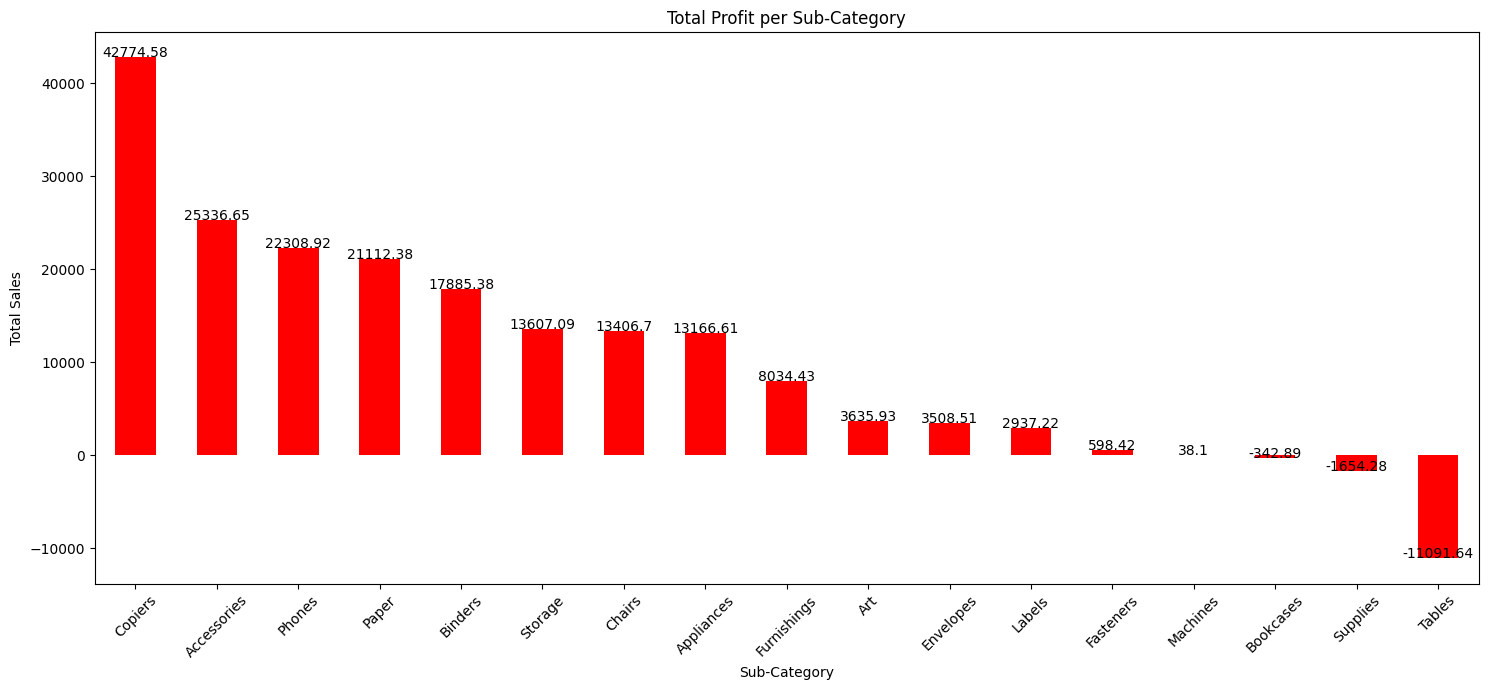

In [149]:
profit_subcategory = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 7))
for i in range(len(profit_subcategory)):
    plt.text(i, profit_subcategory[i], round(profit_subcategory[i], 2), ha='center')
profit_subcategory.plot(kind='bar', color='red')
plt.title('Total Profit per Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [150]:
# Mengonversi kolom 'Order Date' menjadi datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')

In [151]:
# Mengelompokkan data berdasarkan 'Order Date' dan menjumlahkan 'Sales'
sales_per_day = df.groupby('Order Date')['Sales'].sum()

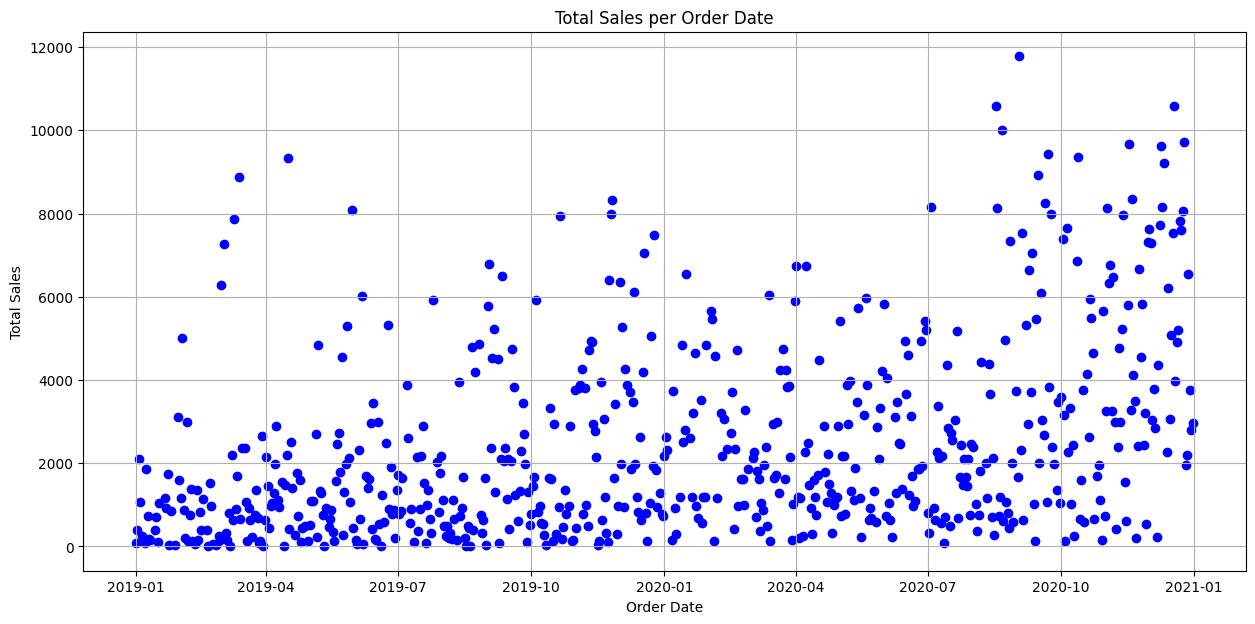

In [152]:
plt.figure(figsize=(15, 7))
plt.scatter(sales_per_day.index, sales_per_day.values, color='b')
plt.title('Total Sales per Order Date')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

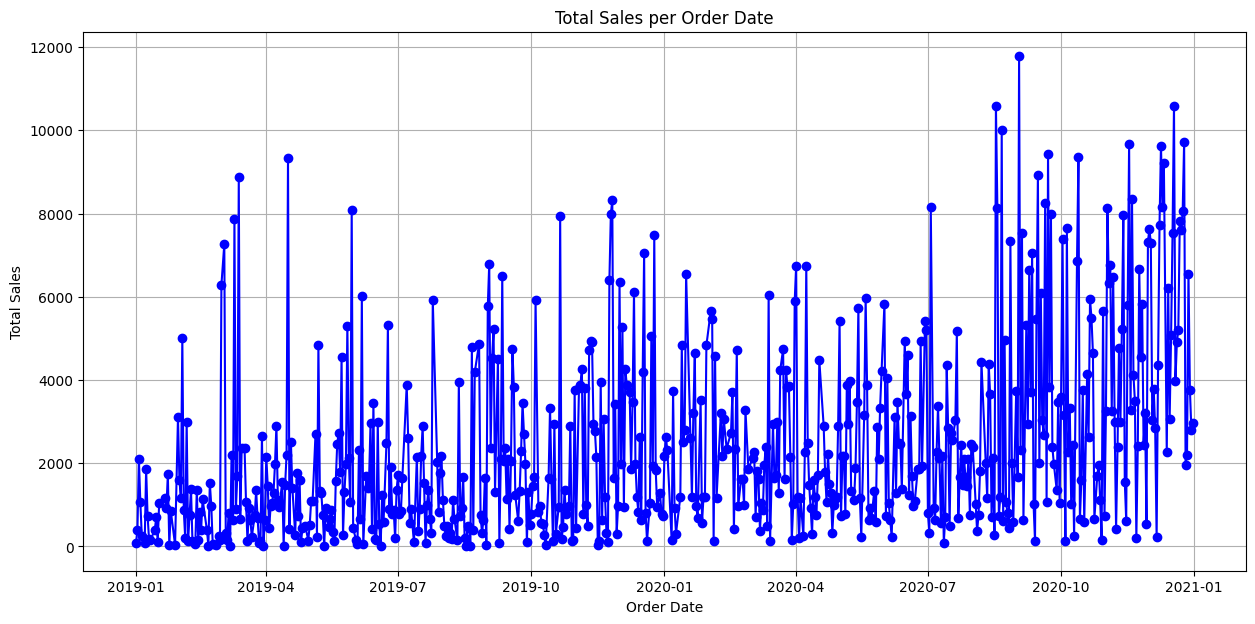

In [153]:
plt.figure(figsize=(15, 7))
plt.plot(sales_per_day.index, sales_per_day.values, marker='o', linestyle='-', color='b')
plt.title('Total Sales per Order Date')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

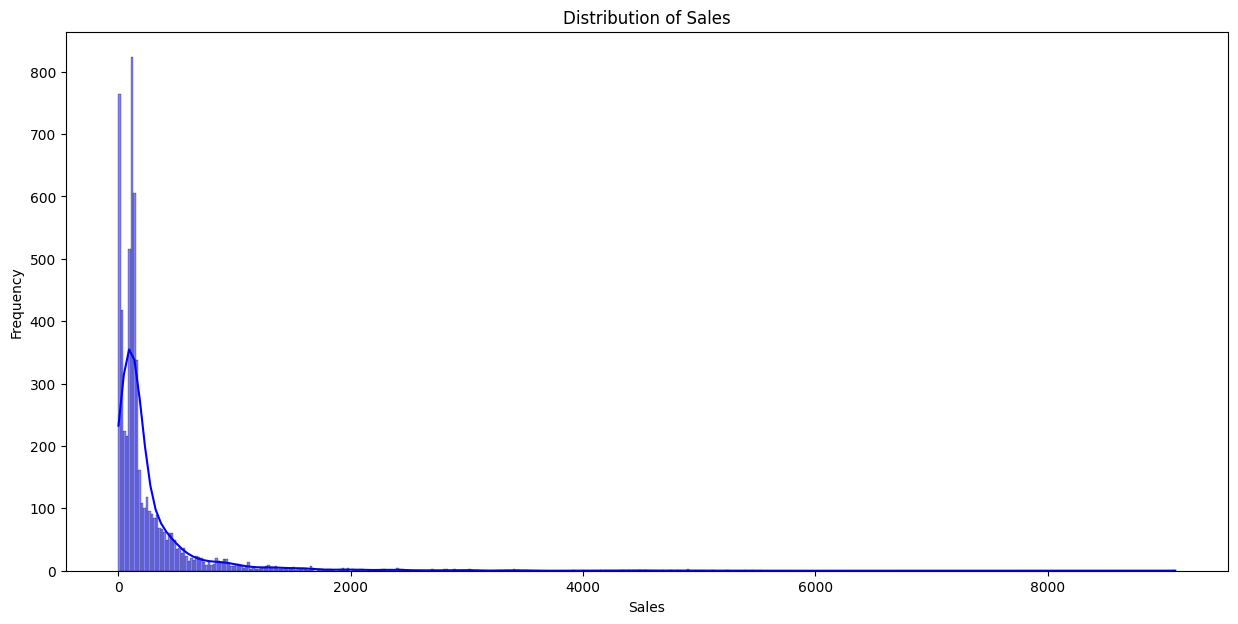

In [154]:
plt.figure(figsize=(15, 7))
sns.histplot(df['Sales'], kde=True, color='blue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [155]:
skewness = df['Sales'].skew()
print(f"Skewness of Sales: {skewness}")

Skewness of Sales: 5.94906843470536


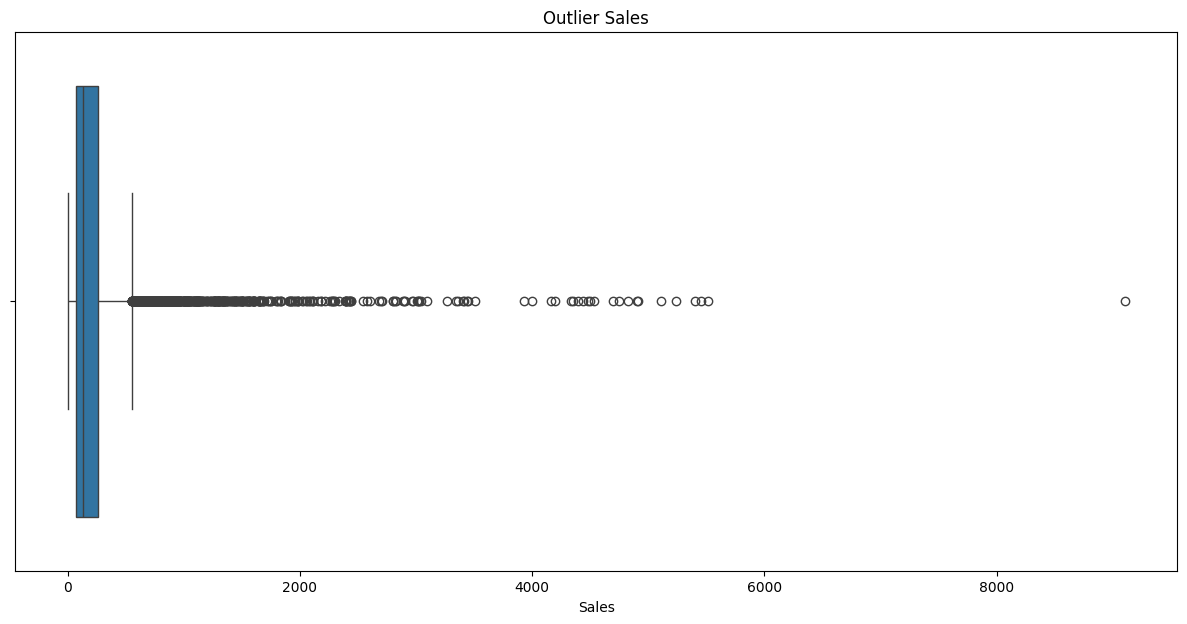

In [156]:
plt.figure(figsize=(15, 7))
sns.boxplot(x=df['Sales'])
plt.title('Outlier Sales')
plt.xlabel('Sales')
plt.show()

In [157]:
# Separate 'Order Date' into day, month, and year columns and convert them to integers
df['day'] = df['Order Date'].dt.day.astype(int)
df['month'] = df['Order Date'].dt.month.astype(int)
df['year'] = df['Order Date'].dt.year.astype(int)

df[['Order Date', 'day', 'month', 'year']].head()

,Order Date,day,month,year
0,2019-01-01,1,1,2019
1,2019-01-02,2,1,2019
2,2019-01-02,2,1,2019
3,2019-01-03,3,1,2019
4,2019-01-03,3,1,2019


In [158]:
df = df.drop(['Order Date'], axis=1)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Row ID+O6G3A1:R6  5901 non-null   int64  
 1   Order ID          5901 non-null   object 
 2   Ship Date         5901 non-null   object 
 3   Ship Mode         5901 non-null   object 
 4   Customer ID       5901 non-null   object 
 5   Customer Name     5901 non-null   object 
 6   Segment           5901 non-null   object 
 7   Country           5901 non-null   object 
 8   City              5901 non-null   object 
 9   State             5901 non-null   object 
 10  Region            5901 non-null   object 
 11  Product ID        5901 non-null   object 
 12  Category          5901 non-null   object 
 13  Sub-Category      5901 non-null   object 
 14  Product Name      5901 non-null   object 
 15  Sales             5901 non-null   float64
 16  Quantity          5901 non-null   int64  


## Transformasi Logaritmik

In [160]:
# Check skewness
skewness = df['Sales'].skew()
print(f"Skewness of Sales: {skewness}")

# log transformation jika skew > 1
if abs(skewness) > 1:
    df['Sales'] = np.log1p(df['Sales'])  # Log transformation

Skewness of Sales: 5.94906843470536


Skewness Sales setelah log transformation: -0.34020096447535686


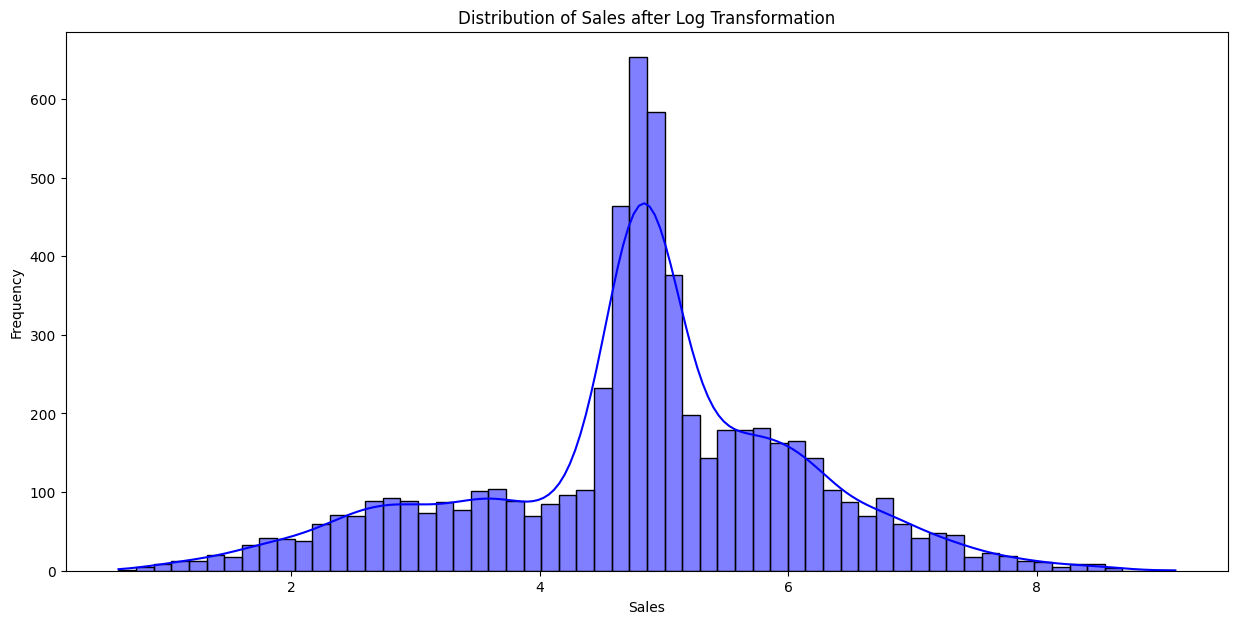

In [161]:
# Menghitung skewness setelah transformasi log
skewness_after_log = df['Sales'].skew()
print(f"Skewness Sales setelah log transformation: {skewness_after_log}")

# Membuat grafik distribusi setelah transformasi log
plt.figure(figsize=(15, 7))
sns.histplot(df['Sales'], kde=True, color='blue')
plt.title('Distribution of Sales after Log Transformation')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

## Manual Model Adaline

In [162]:
class AdalineGD:
    def __init__(self, eta=0.0001, n_iter=200, random_state=None):
        self.eta = eta  # Learning rate
        self.n_iter = n_iter  # Number of iterations
        self.random_state = random_state
        self.w_ = None  # Weights initialization
        self.cost_ = []  # Store cost for each epoch

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []  # Initialize cost function history

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = net_input  # Identity activation function for Adaline
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)  # Update weights for features
            self.w_[0] += self.eta * errors.sum()  # Update bias term (intercept)
            cost = (errors**2).sum() / 2.0  # Compute the cost (sum squared errors)
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Predict the output"""
        return self.net_input(X)

    def score(self, X, y):
        """Calculate R^2 score."""
        from sklearn.metrics import r2_score
        y_pred = self.predict(X)
        return r2_score(y, y_pred)

## Evaluasi Model

In [163]:
# Memisahkan data train dan test untuk kolom 'Order Date' dan 'Sales'
X_order_date = df[['day', 'month', 'year']]
y_sales = df['Sales']

X_train_date, X_test_date, y_train_sales, y_test_sales = train_test_split(X_order_date, y_sales, test_size=0.2, random_state=42)

print("X_train_date shape:", X_train_date.shape)
print("X_test_date shape:", X_test_date.shape)
print("y_train_sales shape:", y_train_sales.shape)
print("y_test_sales shape:", y_test_sales.shape)

X_train_date shape: (4720, 3)
X_test_date shape: (1181, 3)
y_train_sales shape: (4720,)
y_test_sales shape: (1181,)


In [164]:
pipeline_date = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('regressor', AdalineGD(eta=0.0001, n_iter=200, random_state=42))
])

In [165]:
# Train the Adaline model with the training data
pipeline_date.fit(X_train_date, y_train_sales)

# Make predictions on the test data
y_pred_sales = pipeline_date.predict(X_test_date)

MSE: 1.54
RMSE: 1.24
R2 Score: -735905.77


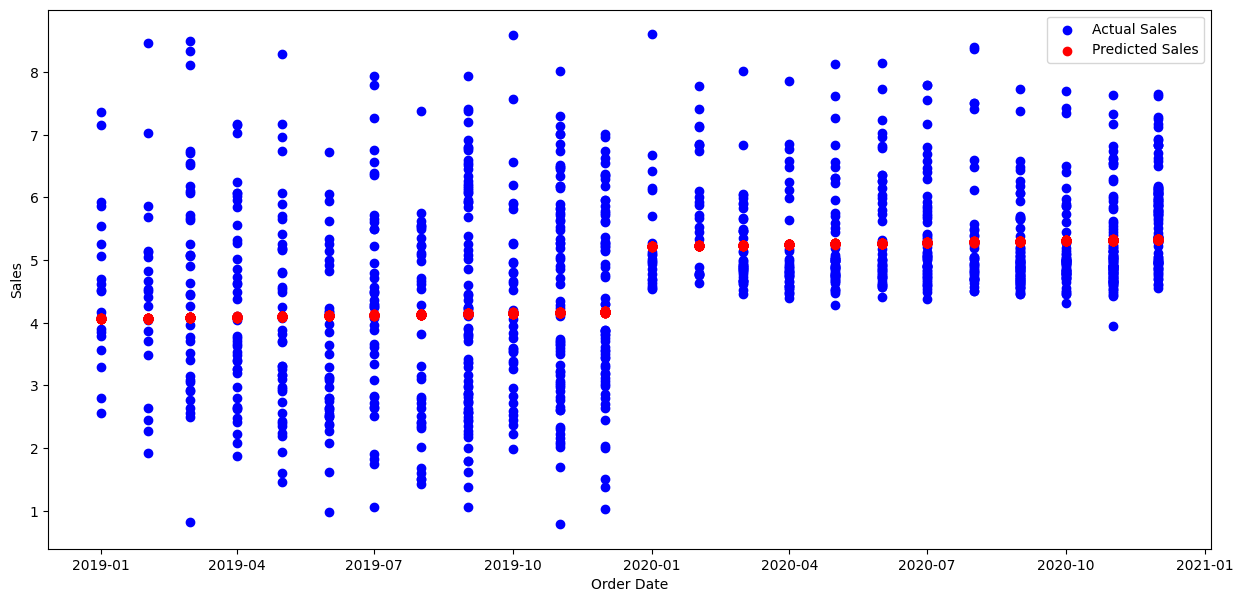

In [169]:
mse = mean_squared_error(y_test_sales, y_pred_sales)
rmse = np.sqrt(mse)
r2 = pipeline_date.named_steps['regressor'].score(X_test_date, y_test_sales)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

# If the target has been log-transformed, inverse transform the predictions to get the original sales values
y_pred_sales_original = np.expm1(y_pred_sales)

# Combine day, month, and year columns into a single datetime column for plotting
X_test_date_combined = pd.to_datetime(X_test_date.assign(day=1))

plt.figure(figsize=(15, 7))
plt.scatter(X_test_date_combined, y_test_sales, color='blue', label='Actual Sales')
plt.scatter(X_test_date_combined, y_pred_sales, color='red', label='Predicted Sales')
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [167]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross validation on the training set
cv_scores = cross_val_score(pipeline_date, X_train_date, y_train_sales, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE scores:", -cv_scores)
print("Average CV MSE:", -np.mean(cv_scores))

Cross-validated MSE scores: [1.37562823 1.43146523 1.26598098 1.32516675 1.41975124]
Average CV MSE: 1.3635984863336614


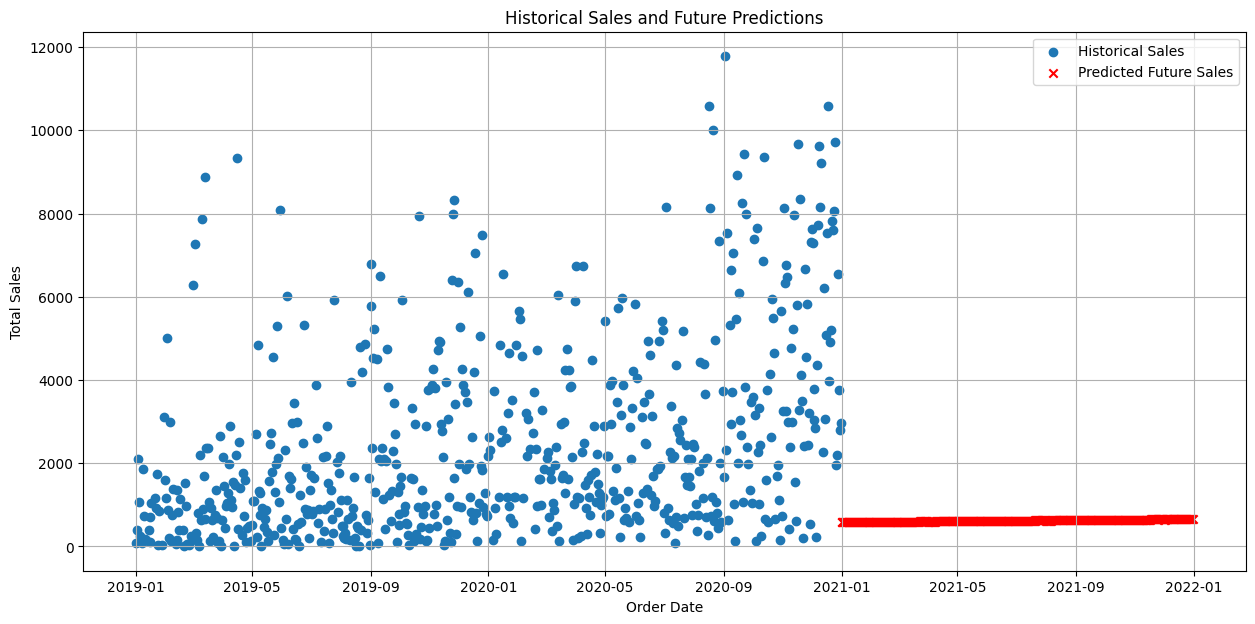

In [168]:
# Prediksi penjualan di masa depan
future_dates = pd.date_range(start="2021-01-01", end="2021-12-31")
future_df = pd.DataFrame({
    'day': future_dates.day,
    'month': future_dates.month,
    'year': future_dates.year
})

pred_future = pipeline_date.predict(future_df)
pred_future_original = np.expm1(pred_future) 

plt.figure(figsize=(15, 7))
plt.scatter(sales_per_day.index, sales_per_day.values, label="Historical Sales", marker="o")
plt.scatter(future_dates, pred_future_original, label="Predicted Future Sales", marker="x", color="red")
plt.title('Historical Sales and Future Predictions')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()
plt.show()